# Assignment 6
## Project 1
The first project you can choose is a continuation of the InterPROscan dataset you worked on for Assignment 5. You now know the structure and type of data that is involved. What I would ike you to do is to develop scikit-learn machine learning models to predict the function of the proteins in the dataset. I'm not going to mandate any particular model, but you should use your knowledge from DS3 to determine good candidate methods and try a couple, and report on yourGiven the size of the data, you should train your machine models in parallel! Dask is an obvious candidate for this, but you can also use any of the other frameworks we discussed in the course.

The "function" of the protein which is the "class" your model should predict is defined as the InterPRO number which covers:

1. more than 90% of the protein's sequence
2. Covers the largest length of the sequence

The "features" that you use to predict that class are the other, smaller, InterPRO annotations. Take care to remove "noise" from the dataset, ie. lines from the TSV file which don't contain InterPRO numbers, proteins which don't have a large feature (according to the criteria above) etc. Be sure to note in your report how you processed the data and why you made the choices you did!

Your script should, given one or more of these TSV files with InterPROscan annotations, produce models (Pickle them to save them!) which predict protein function, and a file of training-data on which you trained them.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preperation

In [4]:
#path = "/data/dataprocessing/interproscan/all_bacilli.tsv"
#path = "all_bacilli.tsv"
path = "C:/Users/piete/Desktop/hiero/bacilli_sample_1000000.tsv"
df = pd.read_csv(path, sep = "\t", names = ["Protein_acc", "Sequence_MD5", "Seq_lenght", "Analysis", "Signature_acc", 
                                            "Signature_description", "Start", "Stop", "Score", "Status", 
                                           "Data", "Interpro_acc", "Interpro_descr", "GO_anno", "Pathway_anno"])

In [5]:
df

,Protein_acc,Sequence_MD5,Seq_lenght,Analysis,Signature_acc,Signature_description,Start,Stop,Score,Status,Data,Interpro_acc,Interpro_descr,GO_anno,Pathway_anno
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03882,cyclo_dehyd_2: bacteriocin biosynthesis cyclod...,2,131,1.6E-21,T,25-04-2022,IPR022291,"Bacteriocin biosynthesis, cyclodehydratase domain",-,-
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",-,-
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,-,-
3,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.160.660,-,311,452,9.1E-46,T,25-04-2022,-,-,NaN,NaN
4,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.40.250,-,191,274,9.1E-46,T,25-04-2022,-,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999993,gi|152025933|gb|ABS23703.1|,6c9de7d202fd6e0351bc6cb0d029711b,66,PANTHER,PTHR11544:SF127,COLD SHOCK PROTEIN CSPB,1,66,9.8E-41,T,25-04-2022,-,-,NaN,NaN
999994,gi|152025933|gb|ABS23703.1|,6c9de7d202fd6e0351bc6cb0d029711b,66,ProSiteProfiles,PS51857,Cold-shock (CSD) domain profile.,1,65,38.715813,T,25-04-2022,IPR002059,"Cold-shock protein, DNA-binding",GO:0003676,Reactome: R-DRE-72163|Reactome: R-DRE-72165|Re...
999995,gi|152026063|gb|ABS23833.1|,af04ba77335f82b29a17c1fa492320de,249,SUPERFAMILY,SSF52540,P-loop containing nucleoside triphosphate hydr...,5,226,8.04E-59,T,25-04-2022,IPR027417,P-loop containing nucleoside triphosphate hydr...,-,MetaCyc: PWY-102|MetaCyc: PWY-1061|MetaCyc: PW...
999996,gi|152026063|gb|ABS23833.1|,af04ba77335f82b29a17c1fa492320de,249,ProSiteProfiles,PS50893,"ATP-binding cassette, ABC transporter-type dom...",5,237,23.316097,T,25-04-2022,IPR003439,"ABC transporter-like, ATP-binding domain",GO:0005524,MetaCyc: PWY-4061|MetaCyc: PWY-4621|MetaCyc: P...


In [6]:
df = df[df["Interpro_acc"] != "-"]

In [7]:
df

,Protein_acc,Sequence_MD5,Seq_lenght,Analysis,Signature_acc,Signature_description,Start,Stop,Score,Status,Data,Interpro_acc,Interpro_descr,GO_anno,Pathway_anno
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03882,cyclo_dehyd_2: bacteriocin biosynthesis cyclod...,2,131,1.6E-21,T,25-04-2022,IPR022291,"Bacteriocin biosynthesis, cyclodehydratase domain",-,-
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",-,-
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,-,-
6,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR00702,TIGR00702: YcaO-type kinase domain,161,501,2.2E-22,T,25-04-2022,IPR003776,YcaO-like domain,-,-
8,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Pfam,PF02624,"YcaO cyclodehydratase, ATP-ad Mg2+-binding",161,501,8.6E-76,T,25-04-2022,IPR003776,YcaO-like domain,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999991,gi|152025933|gb|ABS23703.1|,6c9de7d202fd6e0351bc6cb0d029711b,66,Gene3D,G3DSA:2.40.50.140,-,1,43,1.1E-23,T,25-04-2022,IPR012340,"Nucleic acid-binding, OB-fold",-,MetaCyc: PWY-1061|MetaCyc: PWY-2083|MetaCyc: P...
999994,gi|152025933|gb|ABS23703.1|,6c9de7d202fd6e0351bc6cb0d029711b,66,ProSiteProfiles,PS51857,Cold-shock (CSD) domain profile.,1,65,38.715813,T,25-04-2022,IPR002059,"Cold-shock protein, DNA-binding",GO:0003676,Reactome: R-DRE-72163|Reactome: R-DRE-72165|Re...
999995,gi|152026063|gb|ABS23833.1|,af04ba77335f82b29a17c1fa492320de,249,SUPERFAMILY,SSF52540,P-loop containing nucleoside triphosphate hydr...,5,226,8.04E-59,T,25-04-2022,IPR027417,P-loop containing nucleoside triphosphate hydr...,-,MetaCyc: PWY-102|MetaCyc: PWY-1061|MetaCyc: PW...
999996,gi|152026063|gb|ABS23833.1|,af04ba77335f82b29a17c1fa492320de,249,ProSiteProfiles,PS50893,"ATP-binding cassette, ABC transporter-type dom...",5,237,23.316097,T,25-04-2022,IPR003439,"ABC transporter-like, ATP-binding domain",GO:0005524,MetaCyc: PWY-4061|MetaCyc: PWY-4621|MetaCyc: P...


In [8]:
df = df[["Protein_acc", "Seq_lenght", "Start", "Stop", "Interpro_acc"]]

In [9]:
df

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776
6,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776
8,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776
...,...,...,...,...,...
999991,gi|152025933|gb|ABS23703.1|,66,1,43,IPR012340
999994,gi|152025933|gb|ABS23703.1|,66,1,65,IPR002059
999995,gi|152026063|gb|ABS23833.1|,249,5,226,IPR027417
999996,gi|152026063|gb|ABS23833.1|,249,5,237,IPR003439


In [10]:
df["Feat_lenght"] = (df["Stop"] - df["Start"])

C:\Users\piete\AppData\Local\Temp\ipykernel_28384\1939966583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Feat_lenght"] = (df["Stop"] - df["Start"])


In [11]:
df

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291,129
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624,386
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776,388
6,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340
8,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340
...,...,...,...,...,...,...
999991,gi|152025933|gb|ABS23703.1|,66,1,43,IPR012340,42
999994,gi|152025933|gb|ABS23703.1|,66,1,65,IPR002059,64
999995,gi|152026063|gb|ABS23833.1|,249,5,226,IPR027417,221
999996,gi|152026063|gb|ABS23833.1|,249,5,237,IPR003439,232


In [12]:
#don't use. does not work and would take very long, use apply()
#for index, row in df2.iterrows():
    #if ((df2["Stop"] - df2["Start"]) / df2["Seq_lenght"]) > 0.90:
        #print("1")
        #df2["Size"] = [1]
    #else:
        #print("0")
        #df2["size"] = [0]

In [13]:
def coverage_calc(ddf):
    """
    calculate percentage the feature covers on the total protein length
    use with .apply() method

    returns:
        0 if Interpro_acc < 0.90 (small)
        1 if Interpro_acc > 0.90 (large)
    """
    
    Size = (ddf["Stop"] - ddf["Start"]) / ddf["Seq_lenght"]
    return Size


df["Size"] = df.apply(lambda x:coverage_calc(x), axis = 1)

C:\Users\piete\AppData\Local\Temp\ipykernel_28384\3728154484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Size"] = df.apply(lambda x:coverage_calc(x), axis = 1)


In [14]:
df

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght,Size
0,gi|29898682|gb|AAP11954.1|,547,2,131,IPR022291,129,0.235832
1,gi|29898682|gb|AAP11954.1|,547,161,547,IPR027624,386,0.705667
2,gi|29898682|gb|AAP11954.1|,547,159,547,IPR003776,388,0.709324
6,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340,0.621572
8,gi|29898682|gb|AAP11954.1|,547,161,501,IPR003776,340,0.621572
...,...,...,...,...,...,...,...
999991,gi|152025933|gb|ABS23703.1|,66,1,43,IPR012340,42,0.636364
999994,gi|152025933|gb|ABS23703.1|,66,1,65,IPR002059,64,0.969697
999995,gi|152026063|gb|ABS23833.1|,249,5,226,IPR027417,221,0.887550
999996,gi|152026063|gb|ABS23833.1|,249,5,237,IPR003439,232,0.931727


In [15]:
def rem(df):
    if (df["Size"] > 0.90).any() and (df["Size"] < 0.90).any():
        return df
    
    
    
df2 = df.groupby("Protein_acc").apply(rem).reset_index(drop = True)

In [16]:
df2

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght,Size
0,gi|10172613|dbj|BAB03720.1|,449,1,82,IPR038454,81,0.180401
1,gi|10172613|dbj|BAB03720.1|,449,114,325,IPR027417,211,0.469933
2,gi|10172613|dbj|BAB03720.1|,449,349,448,IPR010921,99,0.220490
3,gi|10172613|dbj|BAB03720.1|,449,359,426,IPR013159,67,0.149220
4,gi|10172613|dbj|BAB03720.1|,449,407,426,IPR018312,19,0.042316
...,...,...,...,...,...,...,...
284606,gi|66970682|gb|AAY60656.1|,114,5,62,IPR001387,57,0.500000
284607,gi|66970704|gb|AAY60676.1|,190,9,186,IPR002104,177,0.931579
284608,gi|66970704|gb|AAY60676.1|,190,11,188,IPR013762,177,0.931579
284609,gi|66970704|gb|AAY60676.1|,190,15,185,IPR011010,170,0.894737


In [17]:
#df3 = df2.groupby(["Protein_acc"])["Size"].transform(max)

In [18]:
df2

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght,Size
0,gi|10172613|dbj|BAB03720.1|,449,1,82,IPR038454,81,0.180401
1,gi|10172613|dbj|BAB03720.1|,449,114,325,IPR027417,211,0.469933
2,gi|10172613|dbj|BAB03720.1|,449,349,448,IPR010921,99,0.220490
3,gi|10172613|dbj|BAB03720.1|,449,359,426,IPR013159,67,0.149220
4,gi|10172613|dbj|BAB03720.1|,449,407,426,IPR018312,19,0.042316
...,...,...,...,...,...,...,...
284606,gi|66970682|gb|AAY60656.1|,114,5,62,IPR001387,57,0.500000
284607,gi|66970704|gb|AAY60676.1|,190,9,186,IPR002104,177,0.931579
284608,gi|66970704|gb|AAY60676.1|,190,11,188,IPR013762,177,0.931579
284609,gi|66970704|gb|AAY60676.1|,190,15,185,IPR011010,170,0.894737


In [19]:
#idx = df2.groupby(["Protein_acc"])["Size"].transform(max)
#ddf_large = df2[idx == df2["Size"]]
#ddf_small = df2[~(df2["Size"] == idx)]

In [20]:
def group_splitter(ddf):
    """
    Takes the dataframe and splits this into two dataframes
    one dataframe containing the largests sequence per protein
    one dataframe that contains all the other sequences

    Arguments:
        ddf:    Dask dataframe

    Returns:
        ddf_large:  Dask dataframe of the largest sequence per protein
        ddf_small:  Dask dataframe of all other smaller sequences per protein
    """
    idx = ddf.groupby(["Protein_acc"])["Size"].transform(max)
    ddf_largest = ddf[idx == ddf["Size"]]
    ddf_smaller = ddf[~(ddf["Size"] == idx)]
    return ddf_largest, ddf_smaller
ddf_large, ddf_small = group_splitter(df2)

In [21]:
ddf_large

,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght,Size
16,gi|10172613|dbj|BAB03720.1|,449,1,448,IPR001957,447,0.995546
26,gi|10172614|dbj|BAB03721.1|,380,1,380,IPR001001,379,0.997368
28,gi|10172615|dbj|BAB03722.1|,73,1,68,IPR036986,67,0.917808
37,gi|10172616|dbj|BAB03723.1|,371,1,371,IPR001238,370,0.997305
54,gi|10172618|dbj|BAB03725.1|,637,5,637,IPR011557,632,0.992151
...,...,...,...,...,...,...,...
284598,gi|66970669|gb|AAY60643.1|,249,1,239,IPR027417,238,0.955823
284599,gi|66970676|gb|AAY60650.1|,339,31,338,IPR017034,307,0.905605
284602,gi|66970682|gb|AAY60656.1|,114,4,111,IPR010982,107,0.938596
284607,gi|66970704|gb|AAY60676.1|,190,9,186,IPR002104,177,0.931579


,Protein_acc,Seq_lenght,Start,Stop,Interpro_acc,Feat_lenght,Size
0,gi|10172613|dbj|BAB03720.1|,449,1,82,IPR038454,81,0.180401
1,gi|10172613|dbj|BAB03720.1|,449,114,325,IPR027417,211,0.469933
2,gi|10172613|dbj|BAB03720.1|,449,349,448,IPR010921,99,0.220490
3,gi|10172613|dbj|BAB03720.1|,449,359,426,IPR013159,67,0.149220
4,gi|10172613|dbj|BAB03720.1|,449,407,426,IPR018312,19,0.042316
...,...,...,...,...,...,...,...
284604,gi|66970682|gb|AAY60656.1|,114,2,70,IPR010982,68,0.596491
284605,gi|66970682|gb|AAY60656.1|,114,7,62,IPR001387,55,0.482456
284606,gi|66970682|gb|AAY60656.1|,114,5,62,IPR001387,57,0.500000
284609,gi|66970704|gb|AAY60676.1|,190,15,185,IPR011010,170,0.894737


Text(0, 0.5, 'Frequency')

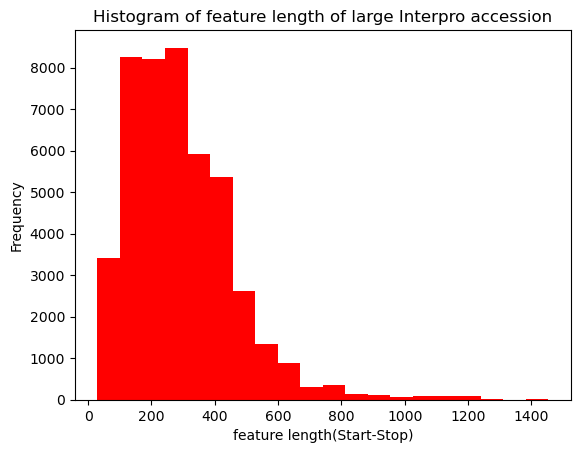

In [38]:
plt.hist(ddf_large["Feat_lenght"],bins=20, color=["red"])
plt.title("Histogram of feature length of large Interpro accession")
plt.xlabel("feature length(Start-Stop)")
plt.ylabel("Frequency")


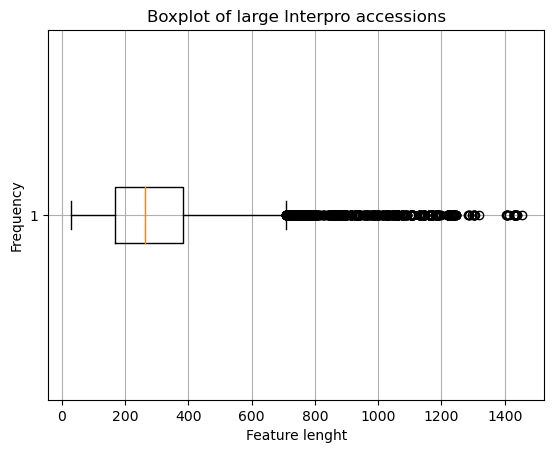

In [39]:
plt.boxplot(ddf_large["Feat_lenght"], vert=False)
plt.title("Boxplot of large Interpro accessions")
plt.ylabel("Frequency")
plt.xlabel("Feature lenght")
plt.grid(True)

predict interpro number largest protein

use smaller interpro anno to predict

largest interpro_acc - smaller interpro_acc

In [25]:
ddf_small = ddf_small.groupby(["Protein_acc", "Interpro_acc"])["Size"].agg("count").reset_index()

In [26]:
ddf_small_piv = ddf_small.pivot(index="Protein_acc", columns="Interpro_acc", values="Size")

In [27]:
ddf_full = ddf_small_piv.merge(ddf_large, how="inner", left_on="Protein_acc", right_on="Protein_acc")

In [28]:
ddf_full = ddf_full.replace(np.nan, 0)

In [29]:
ddf_full = ddf_full.drop(columns=["Start", "Stop", "Seq_lenght"])

In [30]:
X = ddf_full.iloc[:,1:-2].to_numpy()

In [31]:
X

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR001957'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR001001'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR036986'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR010982'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR002104'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR013762']], dtype=object)

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
y = OneHotEncoder().fit_transform(ddf_full[["Interpro_acc"]])

In [34]:
y

<45791x2624 sparse matrix of type '<class 'numpy.float64'>'
	with 45791 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
X_train

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR037883'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR036986'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR001636'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR011188'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR022924'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'IPR005862']], dtype=object)